# Machine Learning Continues

## [Kaggle](https://www.kaggle.com/)

- [Competitions](https://www.kaggle.com/competitions)
- [Datasets](https://www.kaggle.com/datasets)
- [Getting Started](https://www.kaggle.com/competitions?sortBy=deadline&group=all&page=1&pageSize=20&segment=gettingStarted)

## Learning from Disaster: Titanic

- [Titanic tutorials](https://www.kaggle.com/c/titanic#tutorials)
- [Suggested tutorial](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

## Understanding the problem

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

### Research

> On April 15, 1912, [...], the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

### Questions

> Would I survive the Titanic disaster?

---

> What type of Machine Learning problem are we facing?

---

> Although there was some element of luck involved in surviving the sinking, which groups of people were more likely to survive than others?


# Show me the code

## Acquire data

In [56]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
test_check_df = pd.read_csv('data/test-check.csv')

print('Train columns: ', train_df.columns.values, '\n')
print('Test columns: ', test_df.columns.values, '\n')
print('Test check columns: ', test_check_df.columns.values, '\n')

Train columns:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'] 

Test columns:  ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked'] 

Test check columns:  ['PassengerId' 'Survived'] 



In [57]:
print('train_df.shape: ', train_df.shape)
print('test_df.shape: ', test_df.shape)
print('test_check_df.shape: ', test_check_df.shape)

train_df.shape:  (891, 12)
test_df.shape:  (418, 11)
test_check_df.shape:  (418, 2)


## Understanding the data

[![Link to data description](images/kaggle/titanic-data.png)](https://www.kaggle.com/c/titanic/data)

### First look

In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Questions

#### What data types are we facing? Which contains nulls?

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Which features are categorical (nominal, ordinal, ratio, interval) and which are numerical (discrete, continuous, timeseries)?

- Categorical
  - Nominal
    - Survived
    - Sex
    - Embarked
  - Ordinal
    - Pclass
- Numerical
  - Continuous
    - Age
    - Fare
  - Discrete
    - SibSp
    - Parch

#### What's the data distribution?

In [61]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
train_df[['Sex', 'Name', 'Embarked', 'Ticket', 'Cabin']].describe()

,Sex,Name,Embarked,Ticket,Cabin
count,891,891,889,891,204
unique,2,891,3,681,147
top,male,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",S,1601,C23 C25 C27
freq,577,1,644,7,4


## Analysing features

### Sex

In [63]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Class (social economic status)

In [64]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Sex and Class

In [65]:
sex_and_class = train_df[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean()
sex_and_class.sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


### Embarked

<sub>C = Cherbourg, Q = Queenstown, S = Southampton</sub>


In [66]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Sex, Class and Embarked

In [67]:
sex_and_class = train_df[['Pclass', 'Sex', 'Embarked', 'Survived']].groupby(['Pclass', 'Sex', 'Embarked'], as_index=False).mean()
sex_and_class.sort_values(by='Survived', ascending=False)

,Pclass,Sex,Embarked,Survived
6,2,female,C,1.000000
7,2,female,Q,1.000000
1,1,female,Q,1.000000
0,1,female,C,0.976744
2,1,female,S,0.958333
8,2,female,S,0.910448
13,3,female,Q,0.727273
12,3,female,C,0.652174
3,1,male,C,0.404762
14,3,female,S,0.375000


### Age

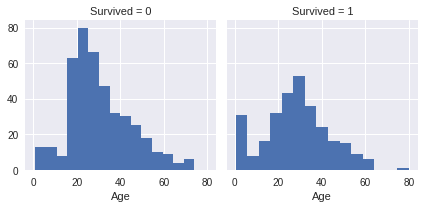

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.FacetGrid(train_df, col='Survived').map(plt.hist, 'Age', bins=15)

### Age and Class

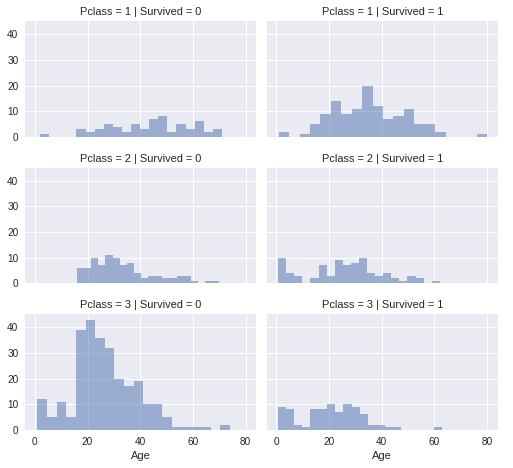

In [69]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Age and Sex

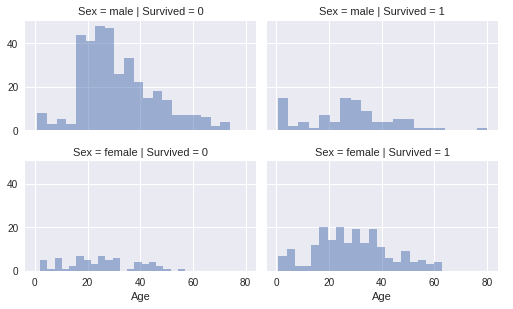

In [70]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Feature Engineering

### Dropping features *

In [71]:
train_df = train_df.drop(['PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Name'], axis=1)
test_df = test_df.drop(['PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Name'], axis=1)

In [72]:
print('train_df: ', train_df.shape, train_df.columns.values)
print('test_df: ', test_df.shape, test_df.columns.values)

train_df:  (891, 5) ['Survived' 'Pclass' 'Sex' 'Age' 'Embarked']
test_df:  (418, 4) ['Pclass' 'Sex' 'Age' 'Embarked']


### Converting Sex

In [73]:
train_df['Sex'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,S
1,1,1,0,38.0,C
2,1,3,0,26.0,S
3,1,1,0,35.0,S
4,0,3,1,35.0,S


### Filling null Ages

In [74]:
mean_age = train_df['Age'].mean()
mean_age

29.69911764705882

In [75]:
train_df['Age'] = train_df['Age'].fillna(mean_age)
test_df['Age'] = test_df['Age'].fillna(mean_age)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Embarked    889 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


### Converting Ages

In [76]:
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
train_df.tail()

,Survived,Pclass,Sex,Age,Embarked
886,0,2,1,27,S
887,1,1,0,19,S
888,0,3,0,29,S
889,1,1,1,26,C
890,0,3,1,32,Q


### Filling null Embarked

<sub>C = Cherbourg, Q = Queenstown, S = Southampton</sub>


In [77]:
most_freq_port = train_df['Embarked'].describe().top
most_freq_port

'S'

In [78]:
train_df['Embarked'] = train_df['Embarked'].fillna(most_freq_port)
test_df['Embarked'] = test_df['Embarked'].fillna(most_freq_port)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
Embarked    891 non-null object
dtypes: int64(4), object(1)
memory usage: 34.9+ KB


### Extract Embarked dummy indicators

In [79]:
test_df = pd.get_dummies(test_df, columns=['Embarked'])
train_df = pd.get_dummies(train_df, columns=['Embarked'])
train_df.head()

,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,0,0,1
1,1,1,0,38,1,0,0
2,1,3,0,26,0,0,1
3,1,1,0,35,0,0,1
4,0,3,1,35,0,0,1


## Creating Models

### Preparing input data

In [80]:
train_data = train_df.drop("Survived", axis=1)
train_label = train_df["Survived"]
test_data  = test_df.copy()

train_data.shape, train_label.shape, test_data.shape

((891, 6), (891,), (418, 6))

### Some possible algorithms

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- **Naive Bayes classifier**
- Decision Tree
- **Random Forrest**
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

### Gaussian Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(train_data, train_label)

gaussian.score(train_data, train_label)

0.7699214365881033

In [82]:
gaussian.predict(test_data)[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [83]:
gaussian.score(test_data, test_check_df.drop(['PassengerId'], axis=1))

0.91148325358851678

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data, train_label)

random_forest.score(train_data, train_label)

0.89786756453423122

In [85]:
random_forest.predict(test_data)[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [86]:
random_forest.score(test_data, test_check_df.drop(['PassengerId'], axis=1))

0.8564593301435407

## Operationalizing

In [87]:
test_data.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34,0,1,0
1,3,0,47,0,0,1
2,2,1,62,0,1,0
3,3,1,27,0,0,1
4,3,0,22,0,0,1


### Random Forest Prediction

In [93]:
# C = Cherbourg
# Q = Queenstown
# S = Southampton
prediction = pd.DataFrame({
    '2010 Adriano': random_forest.predict(pd.DataFrame({
        'Sex': [1],
        'Pclass': [3],
        'Age': [19],
        'Embarked_C': [1],
        'Embarked_Q': [0],
        'Embarked_S': [0]
    })),
    '2017 Adriano': random_forest.predict(pd.DataFrame({
        'Sex': [1],
        'Pclass': [2],
        'Age': [26],
        'Embarked_C': [0],
        'Embarked_Q': [1],
        'Embarked_S': [0]
    }))
}, index=['Survived']).transpose()

prediction

,Survived
2010 Adriano,0
2017 Adriano,1


### Gaussian Naive Bayes prediction

In [94]:
# C = Cherbourg
# Q = Queenstown
# S = Southampton
prediction = pd.DataFrame({
    '2010 Adriano': gaussian.predict(pd.DataFrame({
        'Sex': [1],
        'Pclass': [3],
        'Age': [19],
        'Embarked_C': [1],
        'Embarked_Q': [0],
        'Embarked_S': [0]
    })),
    '2017 Adriano': gaussian.predict(pd.DataFrame({
        'Sex': [1],
        'Pclass': [2],
        'Age': [26],
        'Embarked_C': [0],
        'Embarked_Q': [1],
        'Embarked_S': [0]
    }))
}, index=['Survived']).transpose()

prediction

,Survived
2010 Adriano,1
2017 Adriano,1


### Exporting

In [89]:
prediction.to_csv('output/prediction.csv')